## IMport lib

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Set up dir
parent_directory = os.path.abspath(os.path.join(os.getcwd(), ".."))
data_path = parent_directory + "/data/"
import sys 
sys.path.append(os.path.abspath(".."))


from utils import rgb_to_hsl, rgb_to_hue, rgb_to_hsv_saturation

data = pd.read_csv(data_path+'color_names.csv', header=[0])

In [2]:


samples = [
    [0, 255, 255, 180, 100, 50],  # Cyan
    [255, 0, 255, 300, 100, 50],  # Magenta
    [255, 255, 255, 0, 0, 100],   # White
    [0, 0, 0, 0, 0, 0],           # Black
    [255, 165, 0, 39, 100, 50],   # Orange
    [128, 0, 128, 300, 100, 25],  # Purple
    [255, 255, 0, 60, 100, 50],   # Yellow
    [0, 255, 0, 120, 100, 50],    # Green
    [0, 0, 255, 240, 100, 50],    # Blue
    [128, 128, 128, 0, 0, 50],    # Gray
    [255, 20, 147, 325, 100, 50], # Deep Pink
    [102, 205, 170, 160, 50, 60], # Medium Aquamarine
    [255, 105, 180, 330, 60, 70], # Hot Pink
    [255, 69, 0, 9, 100, 50],     # Red-Orange
    [123, 104, 238, 240, 80, 60], # Medium Slate Blue
]

'Red', 'Green', 'Blue', 'Hue (degrees)', 'HSL.S (%)', 'HSL.L (%), HSV.S (%), HSV.V (%)'

r = 255
g = 255
b = 255

def rgb_to_hex(r, g, b):
    return "#{:02X}{:02X}{:02X}".format(r, g, b)

print( rgb_to_hex(r, g, b) )

for sam in samples:
    r = sam[0]
    g = sam[1]
    b = sam[2]
    pred = rgb_to_hex(r, g, b)
    print("pred", pred)
    row_index = data[data['Hex (24 bit)'] == pred].index
    d = data.iloc[row_index, 0].to_numpy()

    print(d)


def get_color_name(r,g,b):

    data = pd.read_csv(data_path+'color_names.csv', header=[0])

    pred = rgb_to_hex(r, g, b)

    row_index = data[data['Hex (24 bit)'] == pred].index
    names = data.iloc[row_index, 0].to_numpy()

    return names




#FFFFFF
pred #00FFFF
['Aqua' 'Cyan' 'Electric cyan' 'Spanish sky blue']
pred #FF00FF
['Fuchsia' 'Magenta']
pred #FFFFFF
['White']
pred #000000
['Black' 'Registration black']
pred #FFA500
['Orange (web)']
pred #800080
['Patriarch' 'Purple (HTML)']
pred #FFFF00
['Yellow']
pred #00FF00
['Electric green' 'Green (Color Wheel) (X11 green)'
 'Lime (web) (X11 green)']
pred #0000FF
['Blue']
pred #808080
['Gray' 'Gray (HTML/CSS gray)' 'Trolley Grey']
pred #FF1493
['Deep pink' 'Fluorescent pink']
pred #66CDAA
[]
pred #FF69B4
['Hot pink']
pred #FF4500
['Orange-red']
pred #7B68EE
['Medium slate blue']


## Loading images

/Users/frederiknagel/Desktop/Skrivebord/Coding_projects/Color_Detection/data/Basic_color_image_dataset
122
89


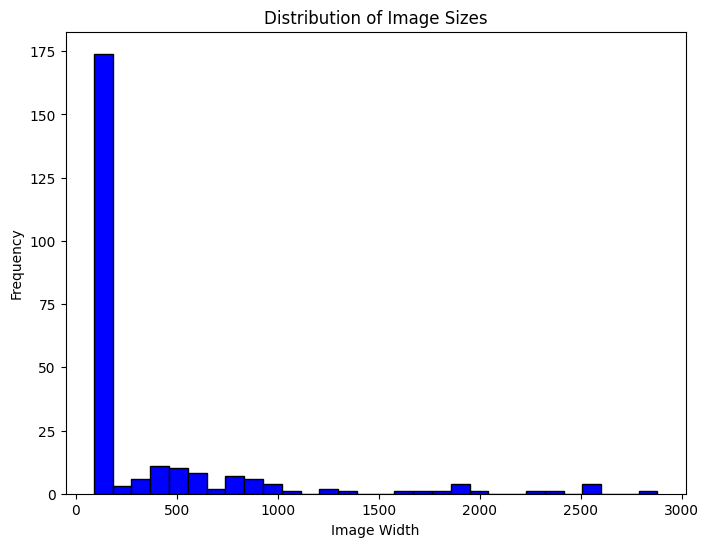

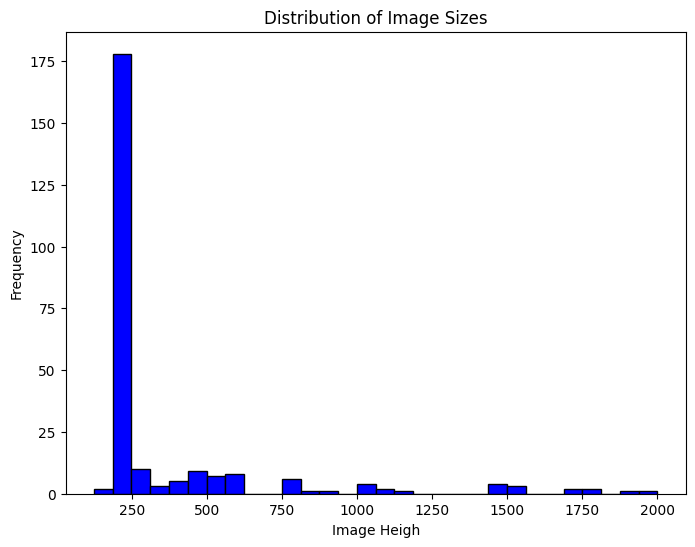

In [3]:
import os
import cv2
import matplotlib.pyplot as plt

def get_image_sizes_and_plot_histogram(dir, base_path="data/Basic_color_image_dataset"):
    image_sizes = []

    # Walk through all subdirectories
    print(dir +"/"+base_path)
    for root, _, files in os.walk(dir +"/"+base_path):
        for file in files:
            
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(root, file)
                # Read image
                img = cv2.imread(image_path)
                if img is not None:
                    h, w = img.shape[:2]  # Get height and width
                    image_sizes.append((w, h))  # Store size

    # Convert sizes to area (width * height)
    image_w = [w for w, h in image_sizes]
    image_h = [h for w, h in image_sizes]

    print( min(image_h))
    print( min(image_w))

    # Plot histogram
    plt.figure(figsize=(8, 6))
    plt.hist(image_w, bins=30, color='blue', edgecolor='black')
    plt.xlabel("Image Width")
    plt.ylabel("Frequency")
    plt.title("Distribution of Image Sizes")
    plt.show()

    # Plot histogram
    plt.figure(figsize=(8, 6))
    plt.hist(image_h, bins=30, color='blue', edgecolor='black')
    plt.xlabel("Image Heigh")
    plt.ylabel("Frequency")
    plt.title("Distribution of Image Sizes")
    plt.show()

    return image_sizes


# Example usage:
image_sizes = get_image_sizes_and_plot_histogram(parent_directory )


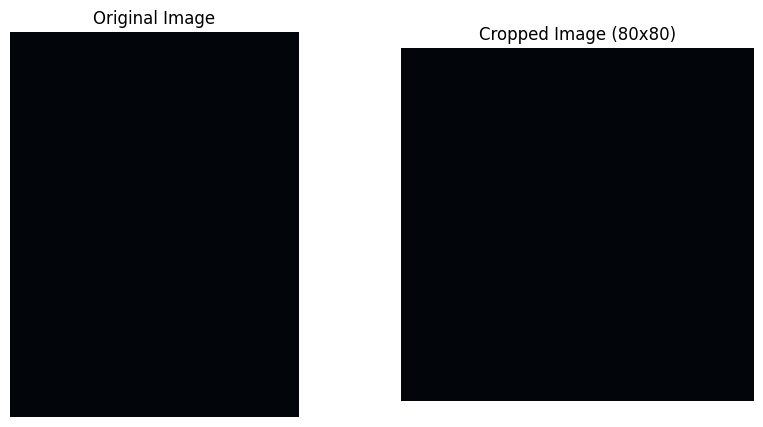

In [4]:
def crop_center(image, crop_size=(80, 80)):
    h, w = image.shape[:2]
    crop_h, crop_w = crop_size

    # Calculate the center coordinates
    start_x = (w - crop_w) // 2
    start_y = (h - crop_h) // 2

    # Crop the image
    cropped_image = image[start_y:start_y + crop_h, start_x:start_x + crop_w]
    
    return cropped_image

base_path="data/Basic_color_image_dataset/black/black17.png"
image_path = parent_directory +"/"+base_path

image = cv2.imread(image_path)

# Crop the image
cropped_image = crop_center(image)


# Plot original and cropped images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cropped_image)
plt.title("Cropped Image (80x80)")
plt.axis("off")

plt.show()


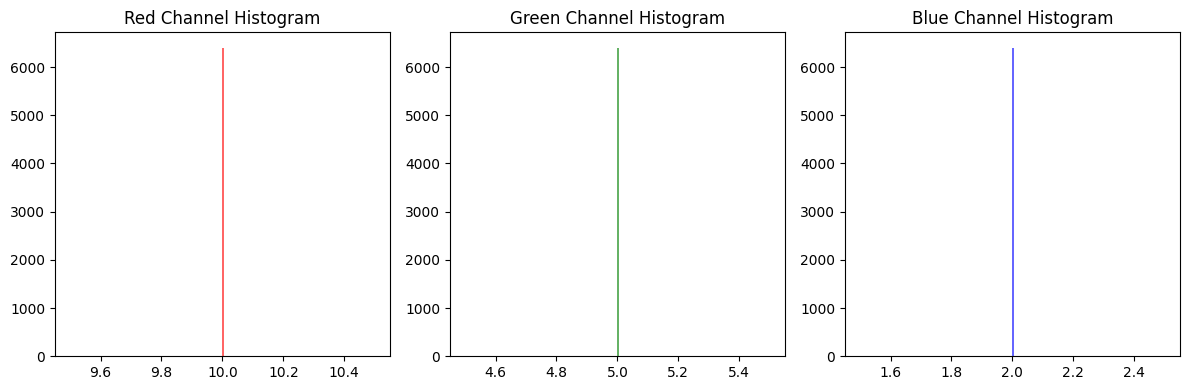

array([], dtype=object)

In [5]:
def plot_rgb_histograms(image):
    # Split the image into its RGB channels
    (blue, green, red) = cv2.split(image)

    # Plot histograms for each channel
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.hist(red.ravel(), bins=256, color='red', alpha=0.6)
    plt.title('Red Channel Histogram')
    

    plt.subplot(1, 3, 2)
    plt.hist(green.ravel(), bins=256, color='green', alpha=0.6)
    plt.title('Green Channel Histogram')
    

    plt.subplot(1, 3, 3)
    plt.hist(blue.ravel(), bins=256, color='blue', alpha=0.6)
    plt.title('Blue Channel Histogram')
    

    plt.tight_layout()
    plt.show()

plot_rgb_histograms(cropped_image)   

get_color_name(10, 5, 2)